In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix


import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


# Accidente cerebrovascular

#### Un accidente cerebrovascular sucede cuando el flujo de sangre a una parte del cerebro se detiene. Algunas veces, se denomina "ataque cerebral".

#### Si el flujo sanguíneo se detiene por más de pocos segundos, el cerebro no puede recibir nutrientes y oxígeno. Las células cerebrales pueden morir, lo que causa daño permanente.

#### Un accidente cerebrovascular se presenta cuando un vaso sanguíneo en el cerebro se rompe, causando un sangrado dentro de la cabeza.

In [2]:
df=pd.read_csv("stroke_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


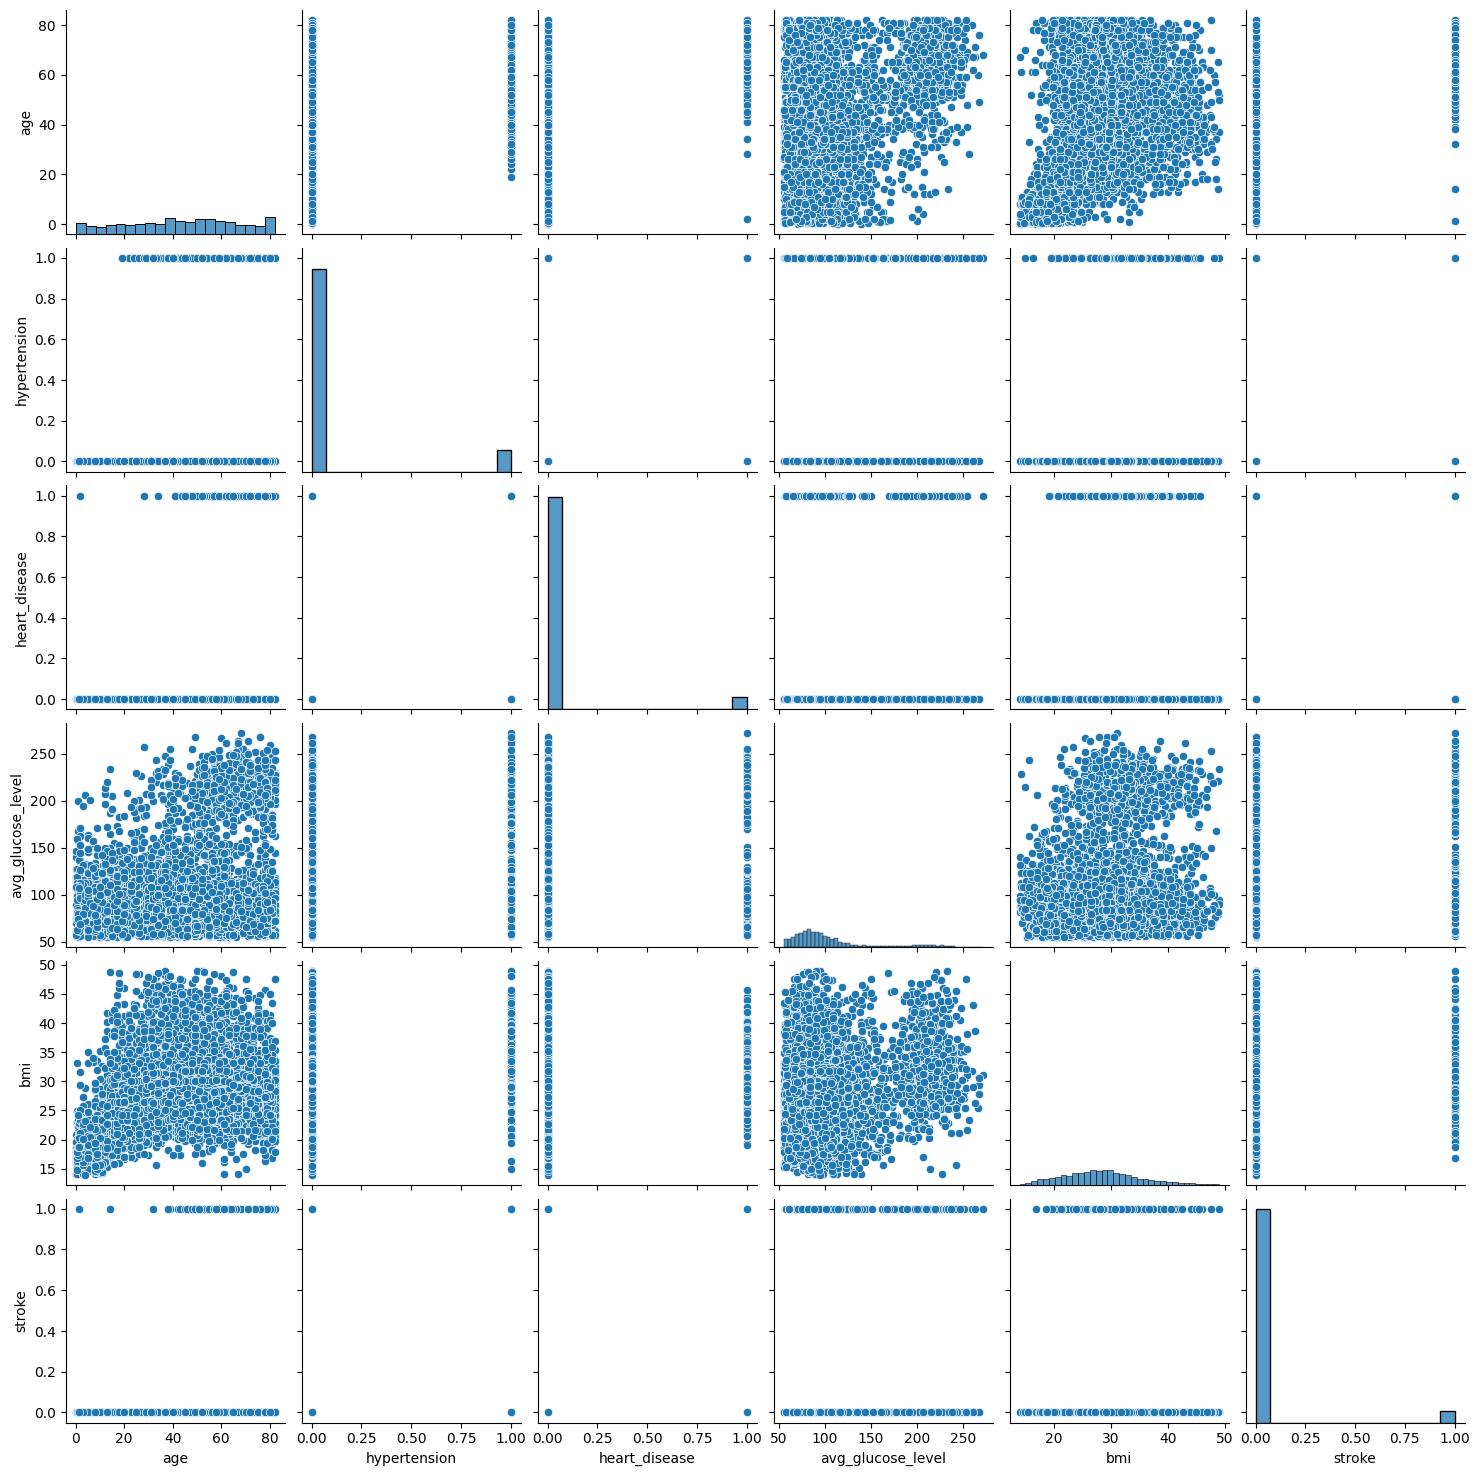

In [4]:
sns.pairplot(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
for i in df.columns:
    print('{} --------------------------> {}'.format(i, df[i].nunique()))


gender --------------------------> 2
age --------------------------> 104
hypertension --------------------------> 2
heart_disease --------------------------> 2
ever_married --------------------------> 2
work_type --------------------------> 4
Residence_type --------------------------> 2
avg_glucose_level --------------------------> 3895
bmi --------------------------> 342
smoking_status --------------------------> 4
stroke --------------------------> 2


In [8]:
df.gender.value_counts()


Female    2907
Male      2074
Name: gender, dtype: int64

In [9]:
df.hypertension.value_counts()


0    4502
1     479
Name: hypertension, dtype: int64

In [10]:
df.heart_disease.value_counts()


0    4706
1     275
Name: heart_disease, dtype: int64

In [11]:
df.ever_married.value_counts()


Yes    3280
No     1701
Name: ever_married, dtype: int64

In [12]:
df.Residence_type.value_counts()


Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

In [13]:
df.stroke.value_counts()


0    4733
1     248
Name: stroke, dtype: int64

In [14]:
df.info

<bound method DataFrame.info of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type

In [15]:
df['age']= df['age'].round()


In [16]:
df[["age"]]= df[["age"]].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   int32  
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 408.7+ KB


<AxesSubplot:title={'center':'age'}, xlabel='stroke'>

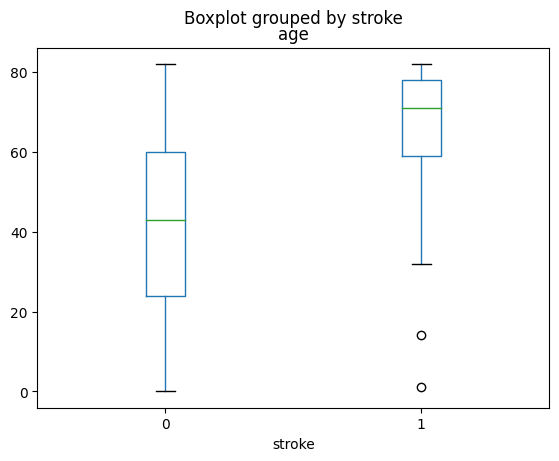

In [17]:
df.boxplot(by ='stroke', column =['age'], grid = False)


In [18]:
df[(df["age"]<20) & (df["stroke"]==1) ]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
205,Female,14,0,0,No,children,Rural,57.93,30.9,Unknown,1
4807,Female,1,0,0,No,children,Urban,70.37,18.7,Unknown,1


#### Se borraran estos dos valores porque consideramos que son atipicos

In [19]:
df= df.drop [(df[“age”] & (df[“stroke”]==1)]


SyntaxError: invalid character '“' (U+201C) (3319682654.py, line 1)

In [ ]:
sns.displot(df["stroke"])

In [ ]:
df[["age"]]= df[["age"]].astype(int)
df.info()


# Variables Categoricas

In [ ]:
def bar_plot(variable):
    var = df[variable]
    varValue = var.value_counts()
    
    plt.figure(figsize = (9, 5))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("frequancy")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

In [ ]:
category1 = ["gender","hypertension","heart_disease","ever_married","work_type",
              "Residence_type","smoking_status","stroke"]
for i in category1:
    bar_plot(i)

# Variables Numericas

In [20]:
def his_plot(variable):
    plt.figure(figsize = (9,5))
    plt.hist(df[variable], bins =70)
    plt.xlabel(variable)
    plt.ylabel("Frequancy")
    plt.title(variable)
    plt.show()

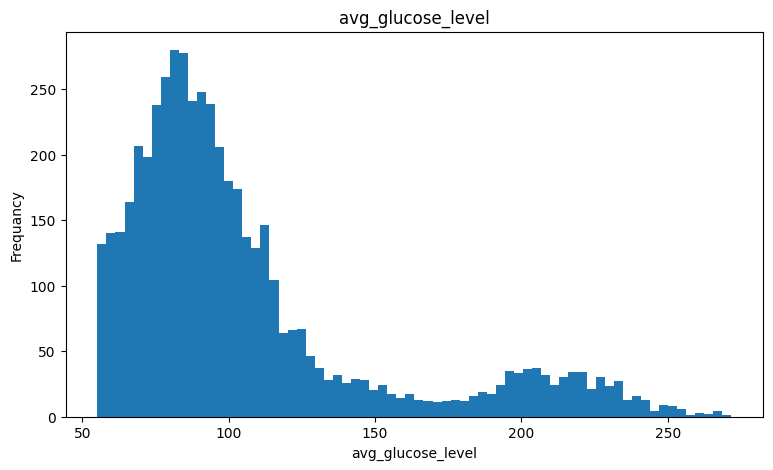

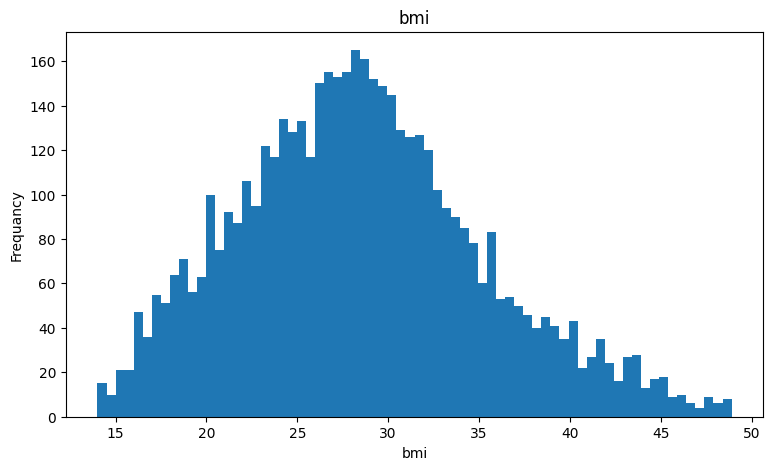

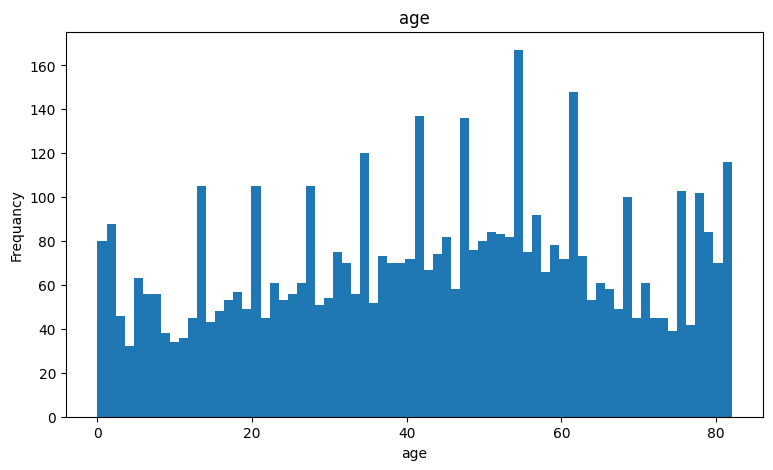

In [21]:
category2 = ["avg_glucose_level","bmi","age"]
for c in category2:
    his_plot(c)

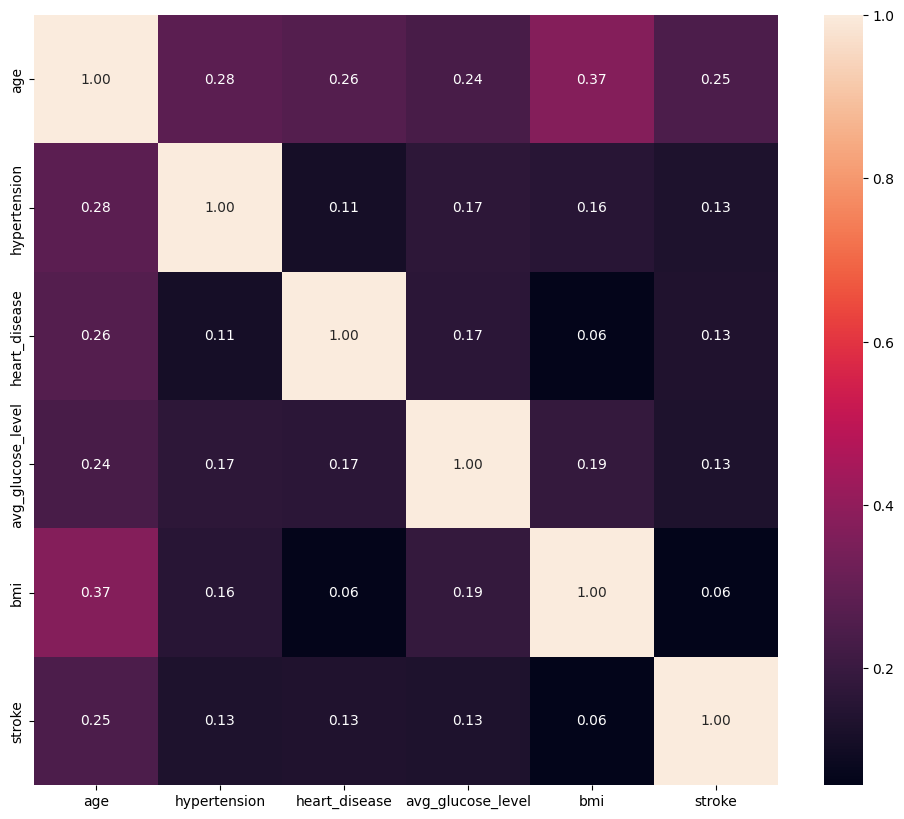

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt= ".2f")
plt.show()

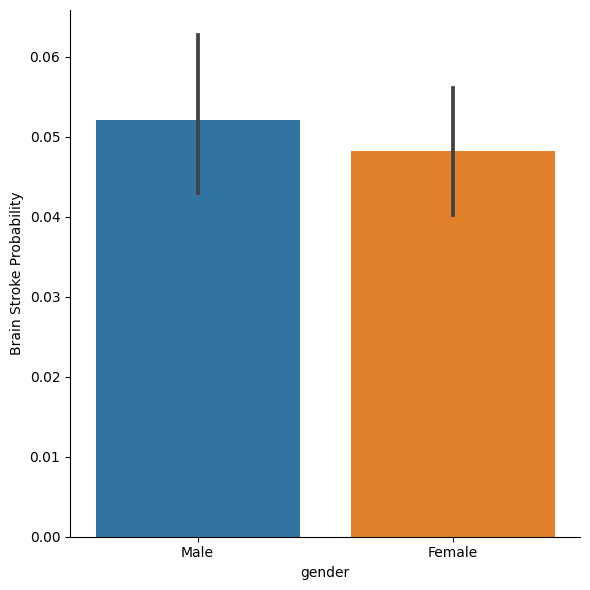

In [23]:
a = sns.factorplot(x = "gender", y = "stroke", data = df, kind = "bar", size = 6)
a.set_ylabels("Brain Stroke Probability")

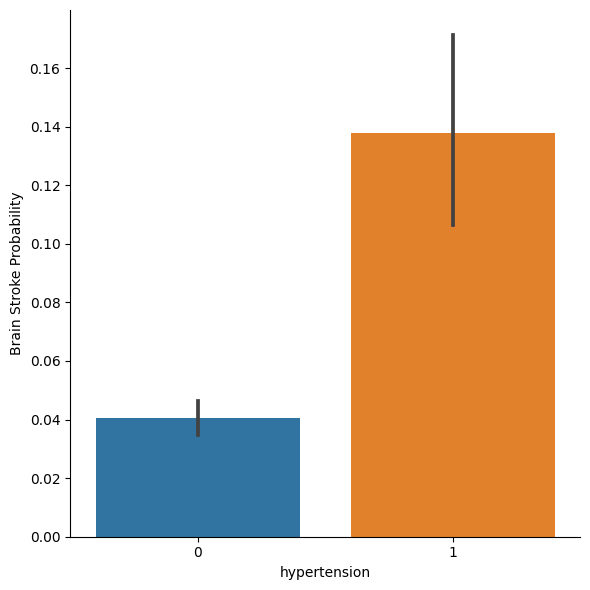

In [24]:
a = sns.factorplot(x = "hypertension", y = "stroke", data = df, kind = "bar", size = 6)
a.set_ylabels("Brain Stroke Probability")

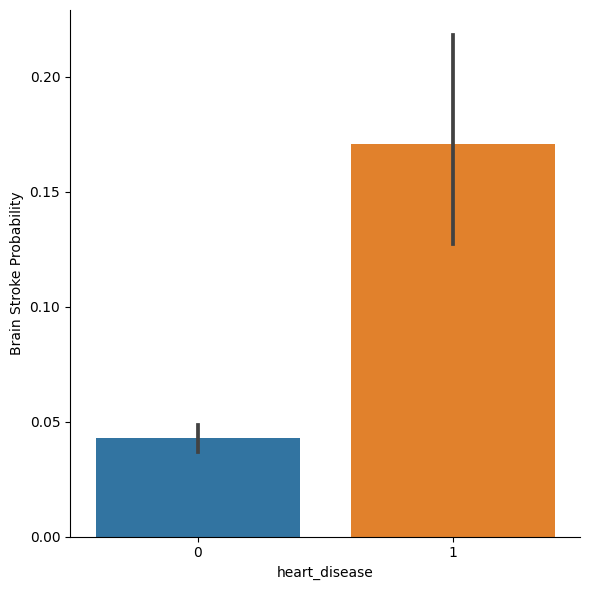

In [25]:
a = sns.factorplot(x = "heart_disease", y = "stroke", data = df, kind = "bar", size = 6)
a.set_ylabels("Brain Stroke Probability")

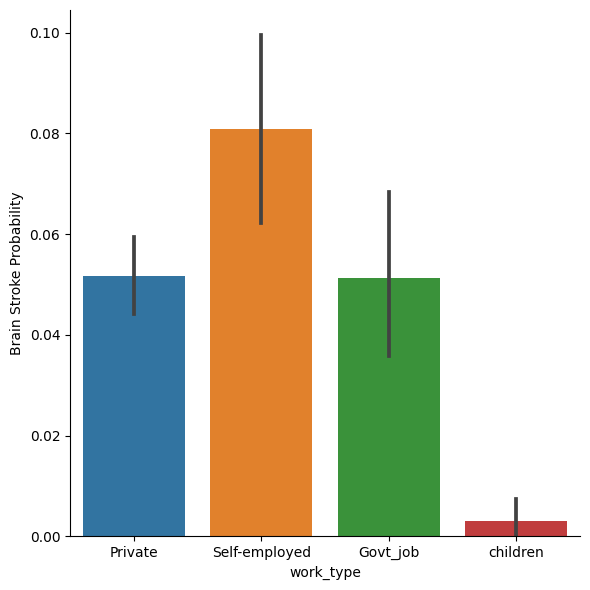

In [26]:
a = sns.factorplot(x = "work_type", y = "stroke", data = df, kind = "bar", size = 6)
a.set_ylabels("Brain Stroke Probability")

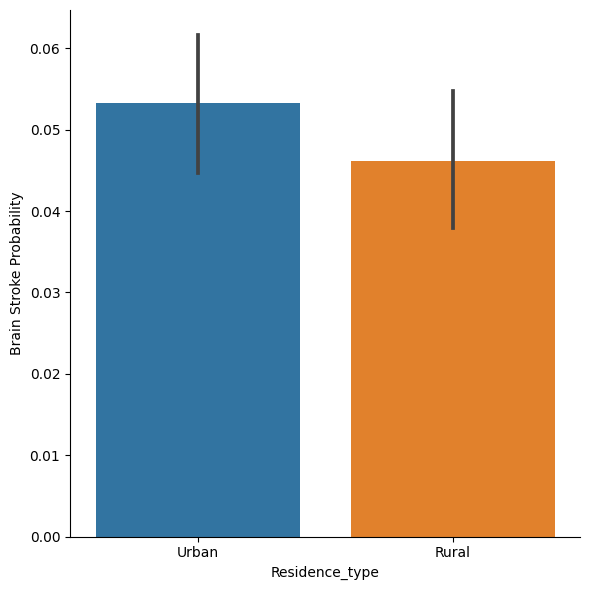

In [27]:
a = sns.factorplot(x = "Residence_type", y = "stroke", data = df, kind = "bar", size = 6)
a.set_ylabels("Brain Stroke Probability")

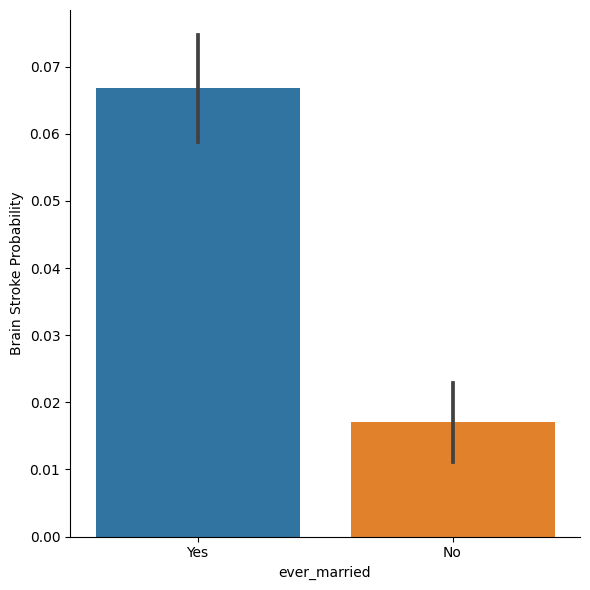

In [28]:
a = sns.factorplot(x = "ever_married", y = "stroke", data = df, kind = "bar", size = 6)
a.set_ylabels("Brain Stroke Probability")

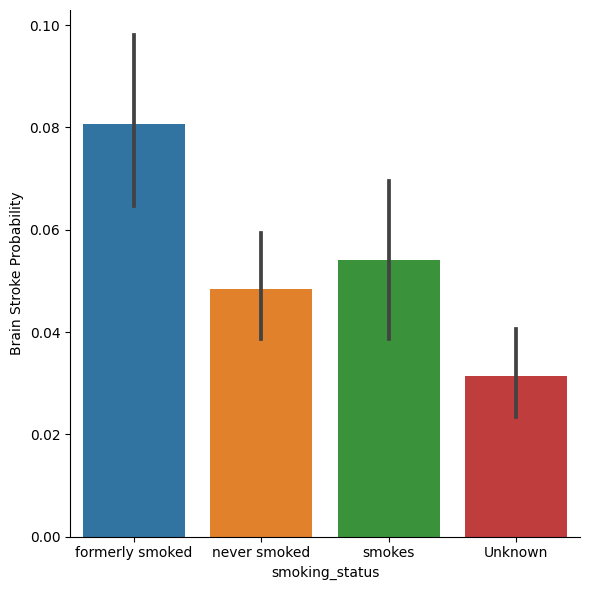

In [29]:
a = sns.factorplot(x = "smoking_status", y = "stroke", data = df, kind = "bar", size = 6)
a.set_ylabels("Brain Stroke Probability")